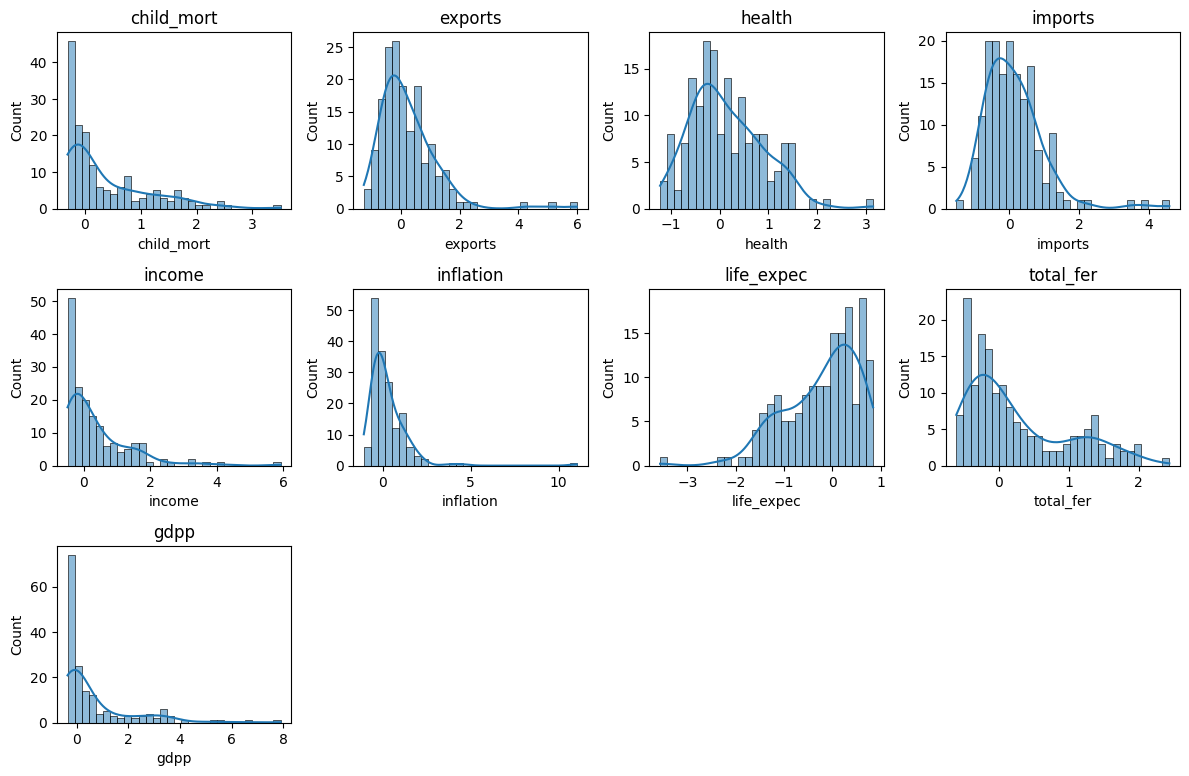

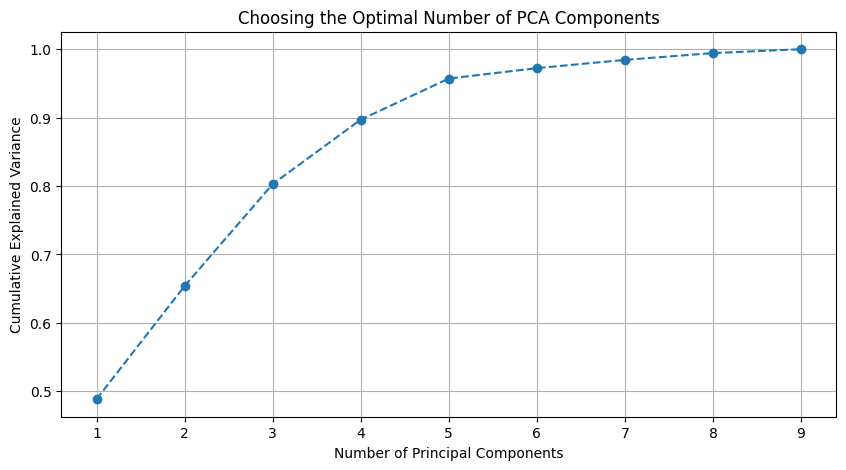

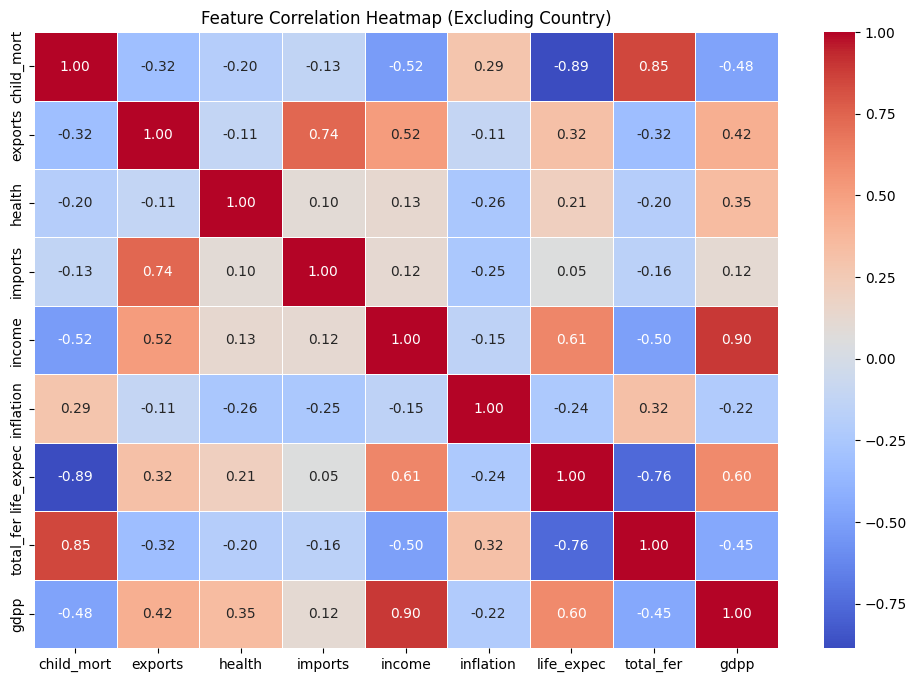

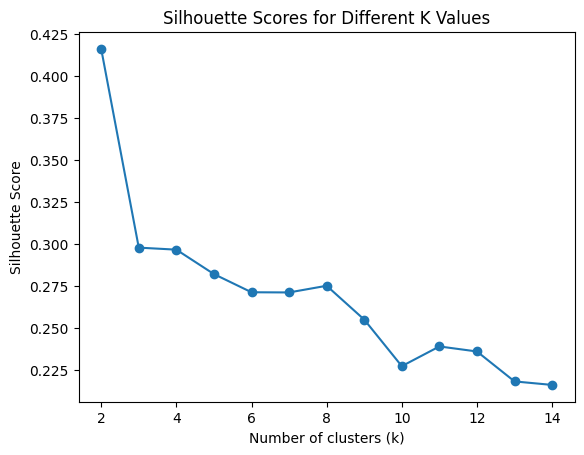

Silhouette Score (KMeans): 0.2752705682091745


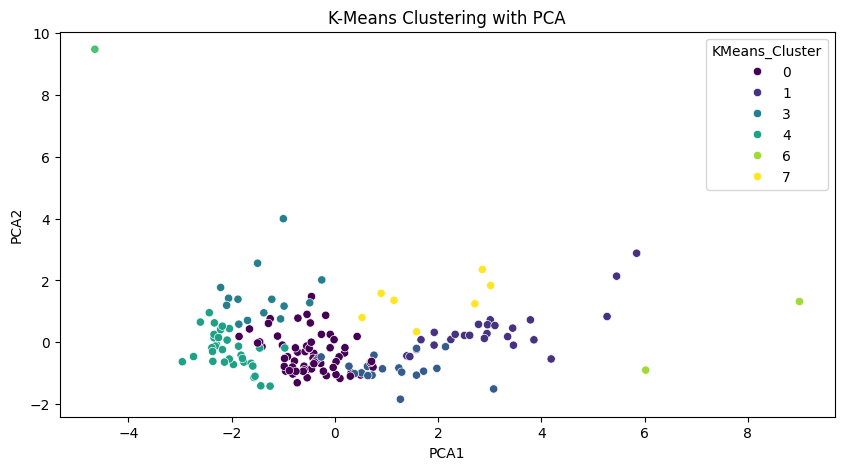

Cluster
0    [Albania, Armenia, Belarus, Belize, Bhutan, Bo...
1    [Australia, Bahrain, Canada, Cyprus, Finland, ...
2                                            [Nigeria]
3    [Algeria, Angola, Argentina, Azerbaijan, Congo...
4    [Austria, Belgium, Brunei, Denmark, Ireland, K...
5    [Antigua and Barbuda, Bahamas, Barbados, Bosni...
6                                         [Luxembourg]
7    [Afghanistan, Bangladesh, Benin, Burkina Faso,...
Name: country, dtype: object
['Afghanistan', 'Bangladesh', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Kenya', 'Lao', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Tajikistan', 'Tanzania', 'Togo', 'Uganda', 'Zambia']
37
Agglomerative Clustering Silhouette Score: 0.2866


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

df = pd.read_csv("country-data.csv" )

df_numeric = df.select_dtypes(include=[float, int])

scaler = RobustScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

plt.figure(figsize=(12, 10))

# Create histograms for each feature
for i, col in enumerate(df_scaled.columns):
    plt.subplot(4, 4, i + 1)  # Adjust grid size based on number of features
    sns.histplot(df_scaled[col], kde=True, bins=30)  # kde=True adds a smooth density curve
    plt.title(col)

plt.tight_layout()  # Adjust layout for readability
plt.show()


pca = PCA()
pca.fit(df_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Optimal Number of PCA Components")
plt.grid()
plt.show()

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Excluding Country)")
plt.show()

pca = PCA(n_components=5)  # Reduce to 2D for visualization
pca_features = pca.fit_transform(df_scaled)
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

k_range = range(2, 15)  # Test k values from 2 to 10
scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(pca_features)
    score = silhouette_score(pca_features, clusters)
    scores.append(score)

# Plot silhouette scores for different k
plt.plot(k_range, scores, marker='o')
plt.title("Silhouette Scores for Different K Values")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


kmeans = KMeans(n_clusters=8, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(pca_features)
print("Silhouette Score (KMeans):", silhouette_score(pca_features, df['KMeans_Cluster']))


# Plot PCA Results with K-Means
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title("K-Means Clustering with PCA")
plt.show()

df['Cluster'] = kmeans.fit_predict(df[['PCA1', 'PCA2']])

country_clusters = df.groupby('Cluster')['country'].apply(list)
print(country_clusters)

print(country_clusters.get(7))
print(len(country_clusters.get(7)))

agglo = AgglomerativeClustering(n_clusters=8)
df['Agglo_Cluster'] = agglo.fit_predict(pca_features)
score = silhouette_score(pca_features, df['Agglo_Cluster'])
print(f"Agglomerative Clustering Silhouette Score: {score:.4f}")

C:\Users\Amjad\AppData\Local\Temp\ipykernel_4700\3828250284.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(


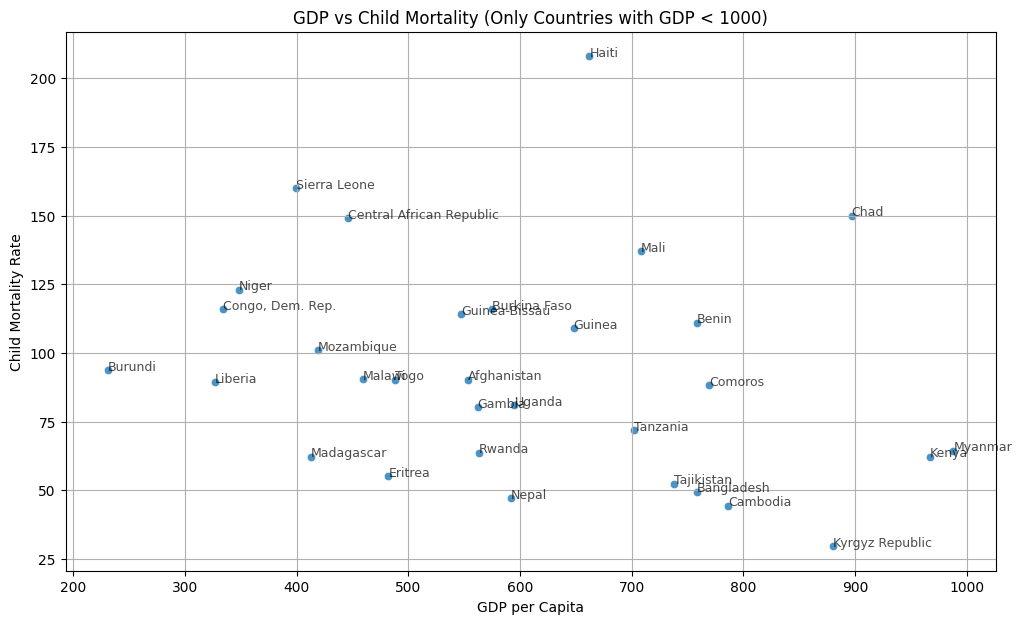

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("country-data.csv")

# Filter for countries with GDP per capita < 1000
df_filtered = df[df['gdpp'] < 1000]

# Scatter plot
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    x=df_filtered['gdpp'], 
    y=df_filtered['child_mort'], 
    palette='viridis', 
    alpha=0.8
)

# Add country labels only for filtered countries
for i in range(len(df_filtered)):
    plt.text(df_filtered['gdpp'].iloc[i], df_filtered['child_mort'].iloc[i], 
             df_filtered['country'].iloc[i], fontsize=9, alpha=0.7)

# Axis labels and title
plt.xlabel("GDP per Capita")
plt.ylabel("Child Mortality Rate")
plt.title("GDP vs Child Mortality (Only Countries with GDP < 1000)")
plt.grid()

plt.show()





In [ ]:
df = pd.read_csv("cluster_7_data.csv")

df_numeric = df.select_dtypes(include=[float, int])

scaler =  RobustScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

pca = PCA()
pca.fit(df_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Optimal Number of PCA Components")
plt.grid()
plt.show()

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Excluding Country)")
plt.show()

pca = PCA(n_components=4)  # Reduce to 2D for visualization
pca_features = pca.fit_transform(df_scaled)
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

k_range = range(2, 15)  # Test k values from 2 to 10
scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(pca_features)
    score = silhouette_score(pca_features, clusters)
    scores.append(score)

# Plot silhouette scores for different k
plt.plot(k_range, scores, marker='o')
plt.title("Silhouette Scores for Different K Values")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(pca_features)
print("Silhouette Score (KMeans):", silhouette_score(pca_features, df['KMeans_Cluster']))


# Plot PCA Results with K-Means
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title("K-Means Clustering with PCA")
plt.show()

df['Cluster'] = kmeans.fit_predict(df[['PCA1', 'PCA2']])

country_clusters = df.groupby('Cluster')['country'].apply(list)
print(country_clusters)


print(country_clusters.get(1))
print(len(country_clusters.get(1)))
print(country_clusters.get(0))
print(len(country_clusters.get(0)))

agglo = AgglomerativeClustering(n_clusters=5)
df['Agglo_Cluster'] = agglo.fit_predict(pca_features)
score = silhouette_score(pca_features, df['Agglo_Cluster'])
print(f"Agglomerative Clustering Silhouette Score: {score:.4f}")

plt.figure(figsize=(12, 7))
sns.scatterplot(
    x=df['PCA1'], 
    y=df['PCA2'], 
    hue=df['Agglo_Cluster'], 
    palette='viridis', 
    alpha=0.8
)

# Add country labels for each point
for i in range(len(df)):
    plt.text(df['PCA1'].iloc[i], df['PCA2'].iloc[i], df['country'].iloc[i], 
             fontsize=8, alpha=0.7, ha='right')

# Labels & title
plt.xlabel("Principal Component 1 (PCA1)")
plt.ylabel("Principal Component 2 (PCA2)")
plt.title("Agglomerative Clustering with PCA Visualization")
plt.legend(title="Clusters")
plt.grid()

plt.show()

# Group countries by Agglomerative Clustering results
country_clusters_agglo = df.groupby('Agglo_Cluster')['country'].apply(list)

# Print all clusters
for cluster, countries in country_clusters_agglo.items():
    print(f"Cluster {cluster}:")
    print(countries)
    print("\n" + "-"*50 + "\n")  # Separator for readability